### <center>San Jose State University<br>Department of Applied Data Science</center>
#  <center>DATA 220<br>Mathematical Methods for Data Analysis</center>
### <center>Fall 2019<br>Instructor: Ron Mak</center>
#  <center>Assignment #8<br>Problem Set</center>
#### <center>100 points total (10 points each)<br><br>Work together with your lab partner.<br>Write your solutions in the indicated cells. You can use more cells if you need to.<br>You can compute by hand, but try use Python code and Python functions.<br>You can add your own functions or other support code.</center>
#### <center>Due Tuesday, November 5, 2019 at 6:00 PM</center>

#### <strong>PROBLEM 1.</strong> The first NASA mission to land men on the moon in July 1969 brought back 64 rock samples. The rock sample had an average weight of 172 ounces on Earth with a variance of 299 ounces squared. Scientists believe that the rock population on the lunar surface does not have a normal distribution. Nevertheless, find a 99% confidence interval for the mean weight of moon rocks.

In [8]:
##### Solution to Problem 1 #####
import math
sample_size = 64
sample_mean = 172
sample_std = 299
critical_value_99 = 2.58
dynamic_value = critical_value_99*sample_std/math.sqrt(sample_size)
low_level = sample_mean-dynamic_value
high_level = sample_mean+dynamic_value
print(f'The 99% confidence interval for the mean weight of moon rocks is ({low_level:.2f},{high_level:.2f})')

The 99% confidence interval for the mean weight of moon rocks is (75.57,268.43)


#### <strong>PROBLEM 2.</strong> Farmer Brown and Farmer Green each plant 100 acres of corn under similar conditions. Farmer Brown's yield was 84 bushels per acre with a standard deviation of 5 bushels. Farmer Green's yield was 80 bushels per acre with a standard deviation of 6 bushels. What is the 90% confidence interval for the mean difference in yield between the two farms?

In [13]:
##### Solution to Problem 2 #####

sample_size = 100
b_sample_mean = 84
b_sample_std = 5
g_sample_mean= 80
g_sample_std = 6
critical_value_90 = 1.645
estimated_std_2samples = math.sqrt(pow(b_sample_std,2)/sample_size+pow(g_sample_std,2)/sample_size)
low_level = b_sample_mean-g_sample_mean - critical_value_90*estimated_std_2samples
high_level = b_sample_mean-g_sample_mean + critical_value_90*estimated_std_2samples
print(f'The standare error is {estimated_std_2samples:.2f}')
print(f'The 90% confidence interval for the mean difference in yield between two farms is ({low_level:.2f},{high_level:.2f}) ')

The standare error is 0.78
The 90% confidence interval for the mean difference in yield between two farms is (2.72,5.28) 


#### <strong>PROBLEM 3.</strong> SJSU bought 36 bulbs for its classroom projectors. The manufacturer claimed that the bulbs should each last more than 800 hours. After using the bulbs, the university discovered that their mean lifetime was 816 hours with a standard deviation of 70 hours. At the 5% level of significance, should the university accept the manufacturer's claim?

##### Solution to Problem 3 #####
5% level signicance is corresponding to 1.645
H0: life of bulbs >800
HA: life of bulbs <=800 and so it is a lower-tail test
test statistic: $z=\frac{816-800}{70/\sqrt{36}} $
                  =1.37
   we reject H0 if z is far to the left of μ0, so the rejection region has the form of an interval (−∞,C];C is the critical value. C here should be -1.645
   since 1.37 > -1.645, so we can't reject H0 and should accept the manufacture's claim.

#### <strong>PROBLEM 4.</strong> A widget making machine is supposed to make widgets that are 0.05 inches thick. Ten widgets are tested each day to ensure the machine is properly calibrated. Today's test averaged 0.053 inches thick with a standard deviation of 0.003. At the 5% level of significance, is the machine properly calibrated?

In [26]:
##### Solution to Problem 4 #####
import math
import scipy.stats as stats
print("""
This is a Hypothesis testing.
H0 = 0.05
HA != 0.05
sample_size = 10, is smaller than 30
5% level of significance is corresponding to 1.645, and the rejection range is z<-1.645 and z>1.645
t value will be used for the calculation
""")
df = 10 - 1
print(f'              df = {df}')
cv = -stats.t.ppf((1 - 95/100)/2, df)  # t critical value
print('t', end='')
print(f' critical value = {cv:.3f}')
t = (0.053 - 0.05)/(0.003/math.sqrt(10))
r = (t>cv or t<-cv)

if (r):
    print(f'{t:.2f} is in the reject range, and the machine is not properly calibrated')
else:
    print(f'{t:.2f} is in the accept range, and the machine is properly calibrated')



This is a Hypothesis testing.
H0 = 0.05
HA != 0.05
sample_size = 10, is smaller than 30
5% level of significance is corresponding to 1.645, and the rejection range is z<-1.645 and z>1.645
t value will be used for the calculation

              df = 9
t critical value = 2.262
3.16 is in the reject range, and the machine is not properly calibrated


#### <strong>PROBLEM 5.</strong> Farmer Brown's cows have averaged 380 pounds in weight. He selects 50 of his cows to put on a new diet to make them gain weight. After being on the new diet, the selected cows weigh an average of 390 pounds with a standard deviation of 35.2 pounds. What are the null and alternative hypotheses? What is the lowest level of significance at which we can reject the null hypothesis?

In [28]:
##### Solution to Problem 5 #####
import math
import scipy.stats as stats

print("""
H0: u = 380
Ha: u > 380
Because sample size > 30, z value will be used.
""")
z = (390-380)/(36.2/math.sqrt(50))
print(f'z value is {z:.2f}')
print('p value is the lowest level of significance since it is a high-tail test')
print('By check critical value of z table, the p value with z value is 0.0255')


H0: u = 380
Ha: u > 380
Because sample size > 30, z value will be used.

z value is 1.95
By check critical value of z table, the lowest level of significance with z value is 0.0255


#### <strong>PROBLEM 6.</strong> Five friends try a new health club to try to lose weight. They record how many pounds each lost and the number of weeks it took. Assume there is a linear relationship between the pounds lost and the number of weeks. What is the slope of the regression line? What is its slope? Create a scatter graph of the data and the regression line.

<table border="1">
    <tr>
        <th>Friend #:</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
        <th>5</th>
    </tr>
    <tr>
        <th>Pounds:</th>
        <td>3</td>
        <td>2</td>
        <td>1</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <th>Weeks:</th>
        <td>6</td>
        <td>5</td>
        <td>4</td>
        <td>9</td>
        <td>11</td>
    </tr>
</table>    

In [36]:
##### Solution to Problem 6 #####


In [32]:
def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = (np.mean(y) - m*np.mean(x))
    
    return m, b  # slope and intercept


In [35]:
import stat
import numpy as np
ys = [3,2,1,4,5]
xs = [6,5,4,9,11]

slope, intercept = calculate_slope_intercept(xs,ys)
print(f'slope is {slope:.2f}')


slope is 0.53


In [156]:
import matplotlib.pyplot as plt 
import numpy as np    

def linear_plot(slope, intercept,x_min,x_max,coe):
    """Plot a line from slope and intercept"""
    x_vals = np.array([x_min,x_max])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.xlim(x_min*(1-coe),x_max*(1+coe))

In [162]:
import matplotlib.pyplot as plt 
def plot_dots_line(xs, ys, title, xlabel, ylabel,fig_size,coe):
    figure = plt.figure(figsize=fig_size)

    plt.xticks(xs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # First show the data line.
    plt.scatter(xs, ys, linewidth=5,c='red')
    slope, intercept = calculate_slope_intercept(xs,ys)
    min_x = min(xs)
    max_x = max(xs)
    linear_plot(slope, intercept,min_x,max_x,coe)

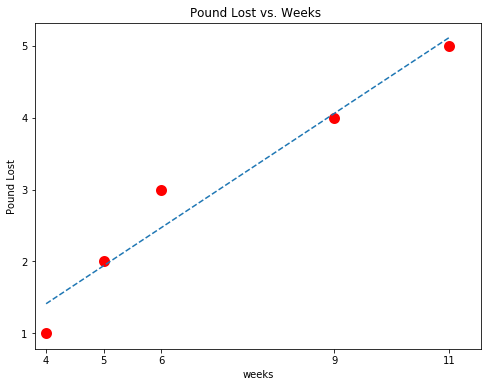

In [163]:
title ='Pound Lost vs. Weeks '
ylabel ="Pound Lost"
xlabel = "weeks"
plot_dots_line(xs,ys,title, xlabel, ylabel,(8,6),0.05)

#### <strong>PROBLEM 7.</strong> Use the data from Problem 6. Calculate and print:
- the variation in the pounds lost that cannot be explained by the weeks on the diet
- the total variation in the pounds lost
- the percentage of variation that is explained by the weeks on the diet
- the correlation coefficient 

In [304]:
##### Solution to Problem 7 #####
import numpy as np
import math
import statistics as stat
ys = [3,2,1,4,5]
xs = [6,5,4,9,11]
x = np.array(xs)
y = np.array(ys)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xx = np.sum(x*x)
sum_yy = np.sum(y*y)
sum_xy = np.sum(x*y)
n = len(y)
print('The variation in the pounds lost cannot be explained by the weeks on the diet is "Residual sum of squares"')
SS_residual = sum_yy - intercept*sum_y -slope*sum_xy
print(f'Residual sum of squalres = {SS_residual:.2f}')
SS_total = sum_yy -sum_y*sum_y/n
print(f'The total variation in the pounds lost = {SS_total:.2f}')
print('The percentage of variation that is explaied by the weeks on the diet is " coefficient of determination"')
r2=1-SS_residual/SS_total
print(f'Coeeficient of determination = {r2:.2f}')



The variation in the pounds lost cannot be explained by the weeks on the diet is "Residual sum of squares"
Residual sum of squalres = 0.47
The total variation in the pounds lost = 10.00
The percentage of variation that is explaied by the weeks on the diet is " coefficient of determination"
Coeeficient of determination = 0.95


In [305]:
mean_x = stat.mean(x)
mean_y = stat.mean(y)
p1 = sum_xy-n*mean_x*mean_y
p2 = math.sqrt(sum_xx-n*mean_x)
p3 = math.sqrt(sum_yy-n*mean_y)
r = p1/(p2*p3)
print(f'Correlation Coeeficient = {r:.2f}')

Correlation Coeeficient = 0.18


#### <strong>PROBLEM 8.</strong> The table below shows annual snowfall. Create a time series graph and plot the linear trend.

<table>
    <tr>
        <th>Year</th>
        <th>Snowfall</th>
    </tr>
    <tr><td>1993</td><td>9.9</td></tr>
    <tr><td>1994</td><td>22.2</td></tr>
    <tr><td>1995</td><td>11.4</td></tr>
    <tr><td>1996</td><td>14.8</td></tr>
    <tr><td>1997</td><td>19.7</td></tr>
    <tr><td>1998</td><td>14.9</td></tr>
    <tr><td>1999</td><td>15.9</td></tr>
    <tr><td>2000</td><td>13.4</td></tr>
    <tr><td>2001</td><td>12.0</td></tr>
    <tr><td>2002</td><td>7.9</td></tr>
    <tr><td>2003</td><td>12.9</td></tr>
    <tr><td>2004</td><td>16.8</td></tr>
    <tr><td>2005</td><td>11.6</td></tr>
    <tr><td>2006</td><td>14.9</td></tr>
    <tr><td>2007</td><td>13.3</td></tr>
    <tr><td>2008</td><td>20.2</td></tr>
    <tr><td>2009</td><td>14.3</td></tr>
    <tr><td>2010</td><td>20.4</td></tr>
    <tr><td>2011</td><td>13.0</td></tr>
    <tr><td>2012</td><td>10.0</td></tr>
    <tr><td>2013</td><td>15.9</td></tr>
    <tr><td>2014</td><td>17.4</td></tr>
    <tr><td>2015</td><td>18.7</td></tr>
    <tr><td>2016</td><td>14.3</td></tr>
    <tr><td>2017</td><td>16.2</td></tr>
    <tr><td>2018</td><td>21.1</td></tr>
</table>

26
26


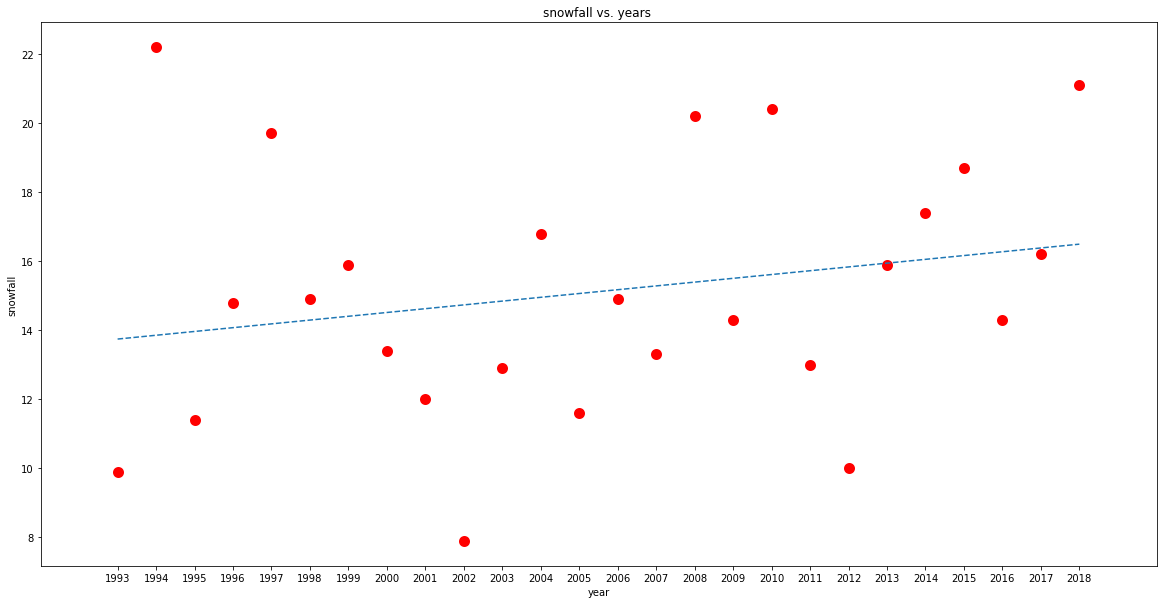

In [210]:
##### Solution to Problem 8 #####
# get the data from markdown table
import re
import numpy as np
year = list(range(1993,2019))
s = """
    <tr><td>1993</td><td>9.9</td></tr>
    <tr><td>1994</td><td>22.2</td></tr>
    <tr><td>1995</td><td>11.4</td></tr>
    <tr><td>1996</td><td>14.8</td></tr>
    <tr><td>1997</td><td>19.7</td></tr>
    <tr><td>1998</td><td>14.9</td></tr>
    <tr><td>1999</td><td>15.9</td></tr>
    <tr><td>2000</td><td>13.4</td></tr>
    <tr><td>2001</td><td>12.0</td></tr>
    <tr><td>2002</td><td>7.9</td></tr>
    <tr><td>2003</td><td>12.9</td></tr>
    <tr><td>2004</td><td>16.8</td></tr>
    <tr><td>2005</td><td>11.6</td></tr>
    <tr><td>2006</td><td>14.9</td></tr>
    <tr><td>2007</td><td>13.3</td></tr>
    <tr><td>2008</td><td>20.2</td></tr>
    <tr><td>2009</td><td>14.3</td></tr>
    <tr><td>2010</td><td>20.4</td></tr>
    <tr><td>2011</td><td>13.0</td></tr>
    <tr><td>2012</td><td>10.0</td></tr>
    <tr><td>2013</td><td>15.9</td></tr>
    <tr><td>2014</td><td>17.4</td></tr>
    <tr><td>2015</td><td>18.7</td></tr>
    <tr><td>2016</td><td>14.3</td></tr>
    <tr><td>2017</td><td>16.2</td></tr>
    <tr><td>2018</td><td>21.1</td></tr>
"""
s1 = re.sub("<tr><td>[1-2][0-9][0-9][0-9]</td><td>", "", s)
s2 = re.sub("</td></tr>","",s1)
s3 = re.split("\n",s2)
snowfall = [float(x) for x in s3[1:-1]]

# plot
title ='snowfall vs. years '
ylabel ="snowfall"
xlabel = "year"
x = np.array(year)
y = np.array(snowfall)
fig_size = (20,10)
plot_dots_line(x,y,title, xlabel, ylabel,fig_size,0.001)

#### <strong>PROBLEM 9.</strong> Using the table from Problem 8, plot the 3- and 5-year moving averages.

In [283]:
##### Solution to Problem 9 #####
import statistics as stat
import matplotlib.pyplot as plt
def ma_line_plot(x,y,average_period, cl):
    yt = []
    ya = []
    for xi,yi in zip(x,y):
        yt.append(yi)
        l = len(yt)
        if(l== average_period):
            av_y = stat.mean(yt)
            ya.append(av_y)
            yt.pop(0)
    plt.plot(x[average_period-1:],ya, cl)
        

In [288]:
def plot_ma(x,y,ma_coe,title,xlabel,my_legend):
    fig_size = (15,10)
    figure = plt.figure(figsize=fig_size)
    plt.plot(x,y,'r*--')
    ma_line_plot(x,y,ma_coe[0],'bo--')
    ma_line_plot(x,y,ma_coe[1],'go--')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(my_legend,loc='upper right')

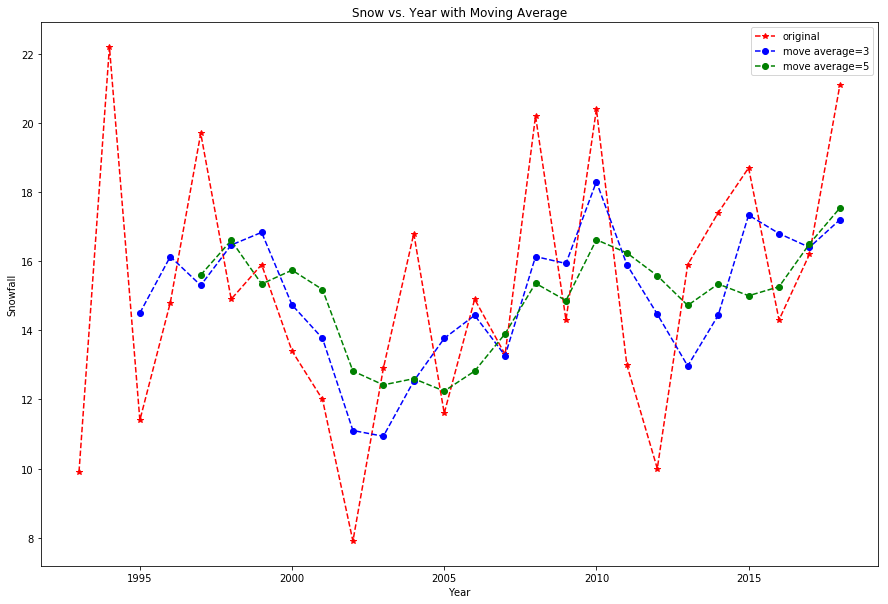

In [289]:
ma_coe =[3,5]
title ='Snow vs. Year with Moving Average'
xlabel='Year'
ylabel='Snowfall'
legend=['original', 'move average=3','move average=5']
plot_ma(year,snowfall,ma_coe,title,xlabel,legend)

#### <strong>PROBLEM 10.</strong> Using the table from Problem 8, exponentially smooth the data using alpha values 0.3 and 0.1

In [275]:
##### Solution to Problem 10 #####
import statistics as stat
import matplotlib.pyplot as plt
def alpha_line_plot(x,y,alpha, cl):
    ys = []
    for xi,yi in zip(x,y):
        l = len(ys)
        if l==0:
            ys.append(yi)
        else:
            t = alpha * yi +(1-alpha)*ys[-1]
            ys.append(t)
    plt.plot(x,ys, cl)
        

In [290]:
def plot_alpha_smooth(x,y,alpha_s,title,xlabel,my_legend):
    fig_size = (15,10)
    figure = plt.figure(figsize=fig_size)
    plt.plot(x,y,'r*--')
    alpha_line_plot(x,y,alpha_s[0],'bo--')
    alpha_line_plot(x,y,alpha_s[1],'go--')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(my_legend,loc='upper right')

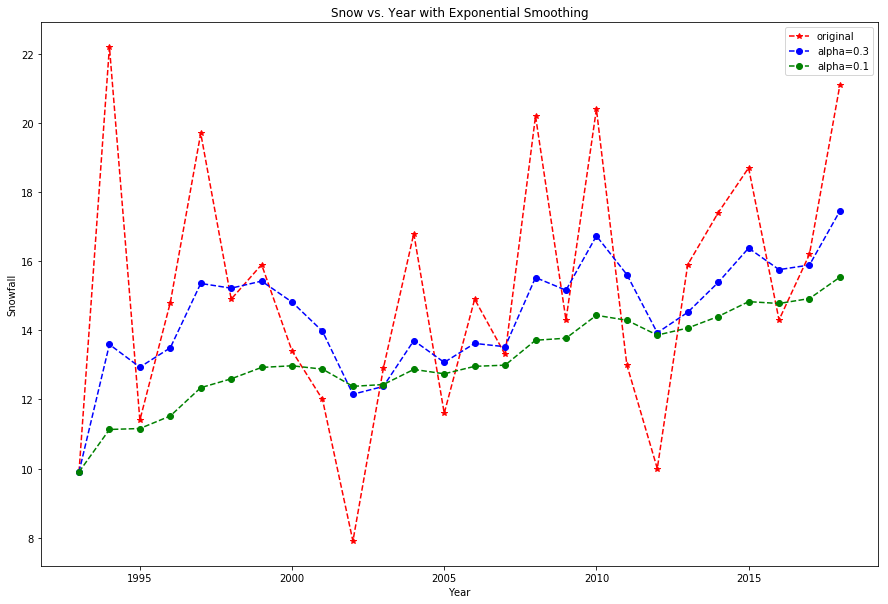

In [291]:
alpha_s =[0.3,0.1]
title ='Snow vs. Year with Exponential Smoothing'
xlabel='Year'
ylabel='Snowfall'
legend=['original', 'alpha=0.3','alpha=0.1']
plot_alpha_smooth(year,snowfall,alpha_s,title,xlabel,legend)